In [1]:
# let's download a pretrained version of AlexNet from torchvision
import torch
import torchvision
import matplotlib.pyplot as plt
import cbir
import numpy as np

## Clean check - Set up DB

In [2]:
# Init database
MMDataSet = cbir.Dataset(folder="MMCroppedLogos")

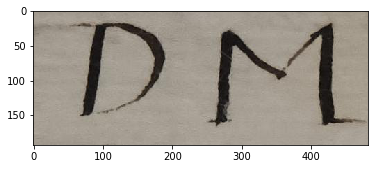

In [3]:
# Select one image by name and just check that it is found
# We will use this as a query image to the database later
image_1 = "103_7_0023_163.jpg" #
img = MMDataSet.read_image(image_1)
MMDataSet.show_image(img)

## AlexNet Encoder Experiment

In [13]:
MMDB_AlexImEmb = cbir.Database(MMDataSet, encoder=cbir.encoders.AlexNet())
MMDB_AlexImEmb.index()


Generating index...
Reshaping 113_21_0099_326.jpg33.564555
Reshaping 113_21_0100_330.jpg33.088996
Reshaping 114_7_0044_538.jpg:16.734612
Reshaping 94_20_0026_2.jpg00:06.551573
Reshaping 94_20_0026_3.jpg00:06.524874
Reshaping 94_20_0080_102.jpg:03.944106
Reshaping 94_20_0080_68.jpg0:03.820424
Reshaping 94_20_0080_72.jpg0:03.647443
Reshaping 94_20_0080_76.jpg0:03.474332
Reshaping 94_20_0080_78.jpg0:03.391205
Reshaping 94_20_0080_81.jpg0:03.265395
Reshaping 94_20_0080_83.jpg0:03.182801
Reshaping 94_20_0080_87.jpg0:03.012944
Reshaping 94_20_0080_89.jpg0:02.927843
Reshaping 94_20_0105_144.jpg:00.758839


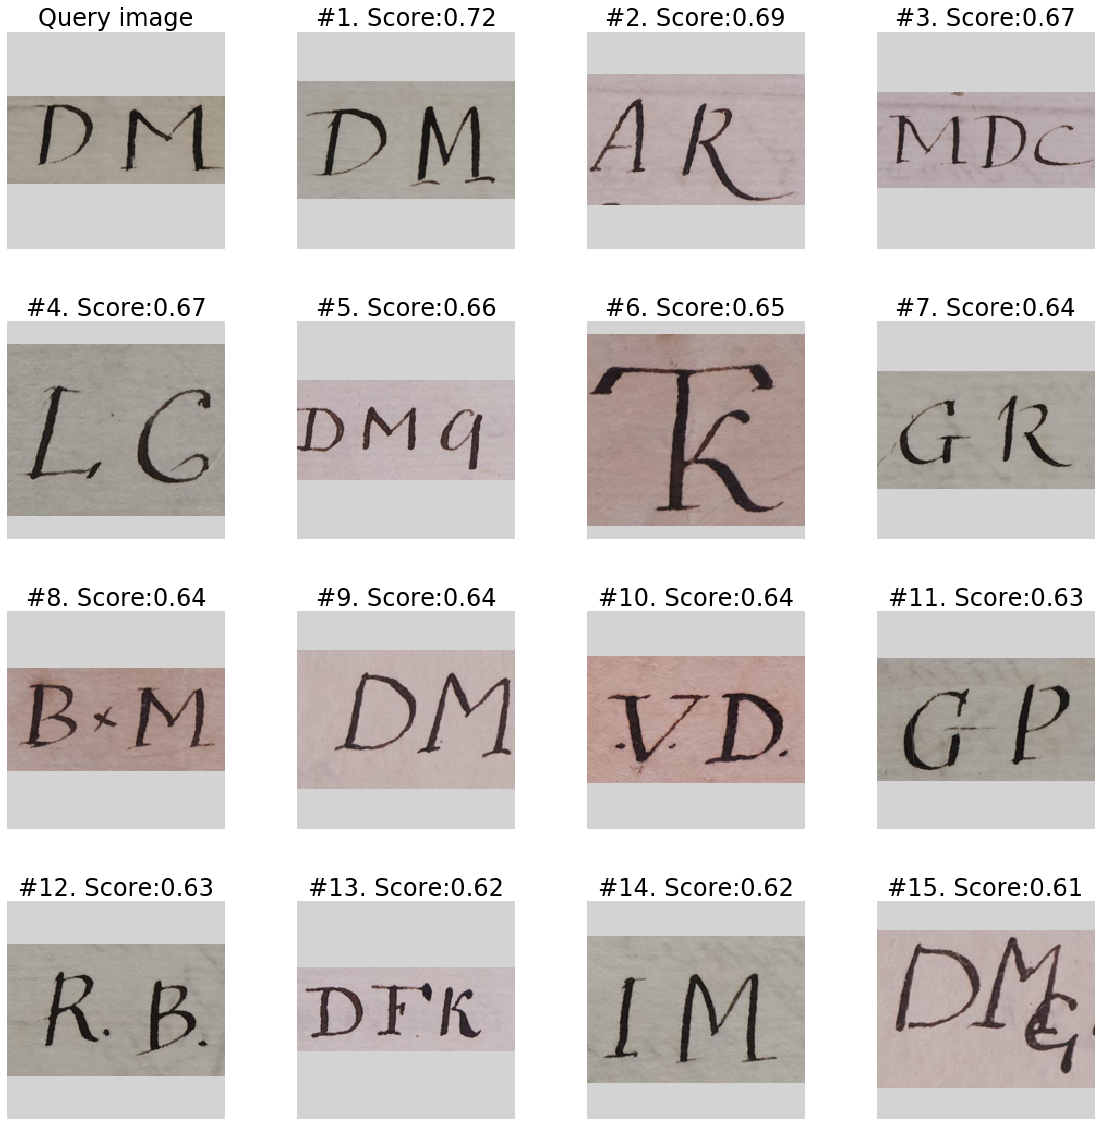

In [14]:
scores =  MMDB_AlexImEmb.retrieve(image_1)
MMDB_AlexImEmb.show_results_grid(image_1, scores, figsize=(20, 20), n=15)

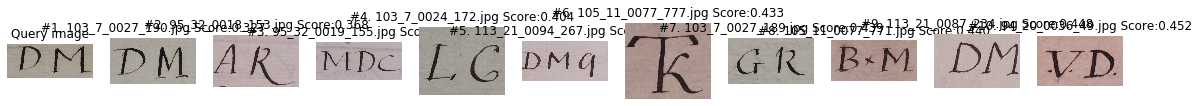

In [6]:
MMDB_AlexImEmb.show_results(image_1, scores, figsize=(20, 20), n=10)

In [ ]:
# The query image has 0 distance to itself (sanity check)
# Less similar images have bigger scores ("scores" is misnamed!)
scores[image_1]

## AutoEncoder Variants Below

### conv autoencoder

In [4]:
MMDB_cAutoEnc = cbir.Database(MMDataSet, encoder=cbir.encoders.cOmniAutoEncoder())
MMDB_cAutoEnc.index()


Generating index...
Reshaping 113_21_0099_326.jpg09.155634
Reshaping 113_21_0100_330.jpg09.045999
Reshaping 114_7_0044_538.jpg:04.291299
Reshaping 94_20_0026_2.jpg00:01.606747
Reshaping 94_20_0026_3.jpg00:01.601163
Reshaping 94_20_0080_102.jpg:00.952494
Reshaping 94_20_0080_68.jpg0:00.926102
Reshaping 94_20_0080_72.jpg0:00.885525
Reshaping 94_20_0080_76.jpg0:00.844776
Reshaping 94_20_0080_78.jpg0:00.825034
Reshaping 94_20_0080_81.jpg0:00.795201
Reshaping 94_20_0080_83.jpg0:00.775375
Reshaping 94_20_0080_87.jpg0:00.734160
Reshaping 94_20_0080_89.jpg0:00.714076
Reshaping 94_20_0105_144.jpg:00.183657


In [ ]:
A=np.load('tmp.npy')
plt.imshow(A)

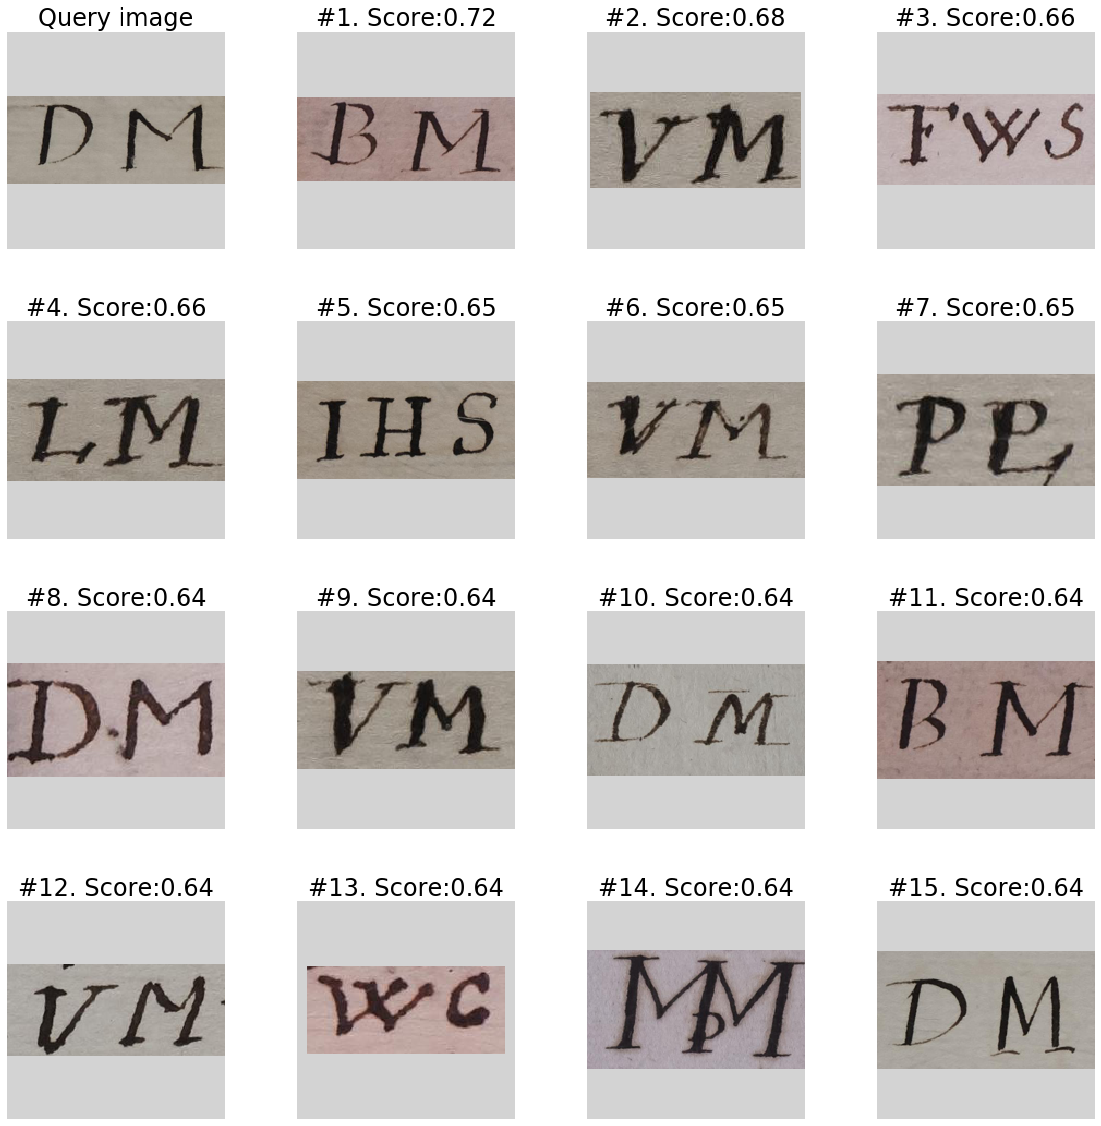

In [8]:
scores =  MMDB_cAutoEnc.retrieve(image_1)
MMDB_cAutoEnc.show_results_grid(image_1, scores, figsize=(20, 20), n=15)

In [ ]:
scores[image_1]

### DenoisingConv autoencoder

In [11]:
MMDB_DcAutoEnc = cbir.Database(MMDataSet, encoder=cbir.encoders.DcOmniAutoEncoder())
MMDB_DcAutoEnc.index()


Generating index...
Reshaping 113_21_0099_326.jpg08.149122
Reshaping 113_21_0100_330.jpg08.047496
Reshaping 114_7_0044_538.jpg:03.833520
Reshaping 94_20_0026_2.jpg00:01.425713
Reshaping 94_20_0026_3.jpg00:01.420631
Reshaping 94_20_0080_102.jpg:00.841953
Reshaping 94_20_0080_68.jpg0:00.818345
Reshaping 94_20_0080_72.jpg0:00.782729
Reshaping 94_20_0080_76.jpg0:00.746908
Reshaping 94_20_0080_78.jpg0:00.729666
Reshaping 94_20_0080_81.jpg0:00.703747
Reshaping 94_20_0080_83.jpg0:00.686355
Reshaping 94_20_0080_87.jpg0:00.649988
Reshaping 94_20_0080_89.jpg0:00.632187
Reshaping 94_20_0105_144.jpg:00.163397


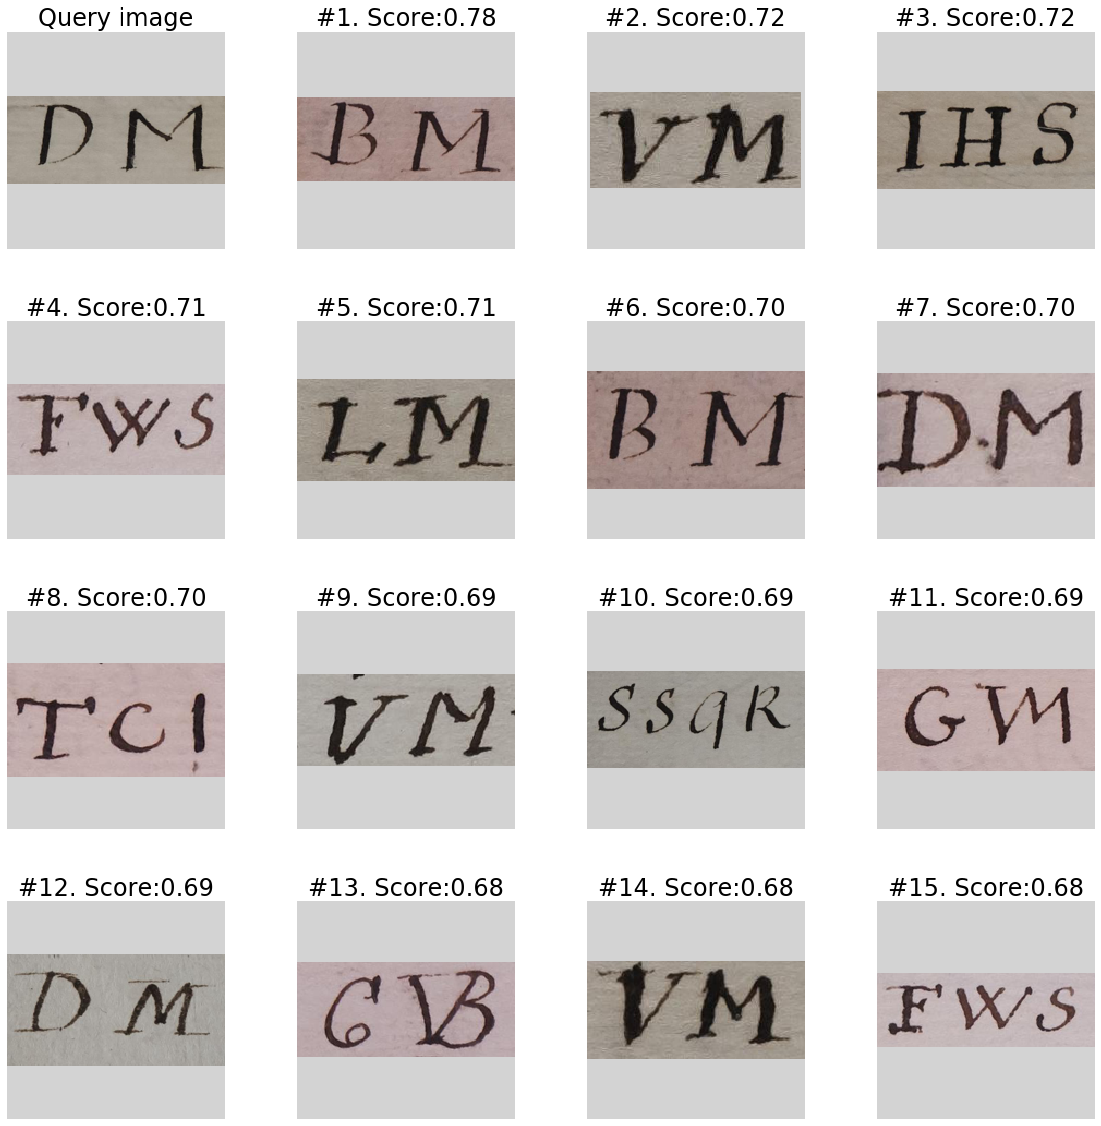

In [12]:
scores =  MMDB_DcAutoEnc.retrieve(image_1)
MMDB_DcAutoEnc.show_results_grid(image_1, scores, figsize=(20, 20), n=15)

In [ ]:
scores[image_1]

## CNN-Related stuff follows, below
In short, probing individual functions to see how they work.

In [ ]:
MMDB_AlexFeatVTEnc = cbir.encoders.VocabularyTree(n_branches=4, depth=4, descriptor=cbir.descriptors.AlexNet())

In [ ]:
features = MMDB_AlexFeatVTEnc.extract_features(MMDataSet)

In [ ]:
MMDB_AlexFeatVTEnc.fit(features)

In [ ]:
# we create the model as usual
MMDB_AlexFeatVTEnc = cbir.Database(MMDataSet, encoder=MMDB_AlexFeatVTEnc)

In [ ]:
MMDB_AlexFeatVTEnc.index()

In [ ]:
scores = MMDB_AlexFeatVTEnc.retrieve(image_1)
MMDB_AlexFeatVTEnc.show_results(image_1, scores, figsize=(20, 10), n=10)

In [ ]:
import random
query = random.choice(MMDB_AlexFeatVTEnc.dataset)
scores =  MMDB_AlexFeatVTEnc.retrieve(query)
MMDB_AlexFeatVTEnc.show_results(query, scores, figsize=(20, 10), n=8)

## This is for hand-generated features (e.g. SIFT, Orb etc)
Mainly suggests that gradient-based features are not ideal
for this sort of problem

In [ ]:
# Init database, and select an image to test on
database = cbir.Dataset(folder="MMCroppedLogos")
ezsift = cbir.descriptors.EzSIFT()
image_1 = "103_7_0023_163.jpg"
database.show_image(database.read_image(image_1))

In [ ]:
# Each image generates several feature vectors, of dim 128
features = database.extract_features(image_1)
plt.imshow(features, aspect="auto")

In [ ]:
voc = cbir.encoders.VocabularyTree(n_branches=3, depth=3, descriptor=ezsift)

In [ ]:
# I *think* this extracts features from *all* the images
features=voc.extract_features(database)

In [ ]:
# We can now construct the tree using the extracted features
voc.fit(features)

In [ ]:
# This builds the index (inverted file structure)
db = cbir.Database(database, encoder=voc)
db.index()

In [ ]:
# store, so recomputation not necessary
db.save()

In [ ]:
from PIL import ImageOps
def show_results_grid(query_path, 
                          scores_dict, n=3, figsize=(4., 4)):
        
        def partitiongrid(n):
            def factorize(num):
                return [(n,round(num/n)) for n in 
                        range(1, num + 1) if num % n == 0]

            F=factorize(n)
            L = len(F)
            
            midind=int(L / 2) - (L+1) % 2
            
            return F[midind]
         
        partition = partitiongrid(n+1)
        
        fig = plt.figure()
        grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols = partition,  # creates grid of axes
                 axes_pad = 0.5,  # pad between axes in inch.
                 )
        
        img_ids = list(scores_dict.keys())
        scores = list(scores_dict.values())
        
        grid[0].imshow(database.read_image(query_path),
                      extent=[-100.5, 100.5, 5-100.5, 100.5])
        grid[0].axis("off")
        grid[0].set_title("Query image", fontsize="large")
        
        for i, ax in enumerate(grid[1:]):
            nscore = np.exp(-scores[i+1])
            ax.axis("off")
            im = database.read_image(img_ids[i+1])
            im = Image.fromarray(im)
            imr = resize_with_padding(im, (200,200))
            
            #ax.imshow(database.read_image(im),
            #         interpolation='bilinear',
            #         extent=[-100.5, 100.5, -100.5, 100.5])
            
            ax.imshow(imr,
                      interpolation='bilinear',
                      extent=[-100.5, 100.5, -100.5, 100.5])
            ax.set_title("#%d. Score:%.2f" %
                        (i+1, nscore), 
                        fontsize="large")
        return

In [ ]:
# Query image and show nearest matches (dire!)
from mpl_toolkits.axes_grid1 import ImageGrid
query = image_1
scores = db.retrieve(query)
show_results_grid(query, scores, figsize=(20, 10), n = 10)

In [ ]:
dir(database)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


def get_demo_image():
    import numpy as np
    from matplotlib.cbook import get_sample_data
    #f = get_sample_data("./bivariate_normal.npy", asfileobj=False)
    z = np.load("./bivariate_normal.npy")
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)


fig = plt.figure(figsize=(5.5, 3.5))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 3),
                 axes_pad=0.1,
                 add_all=True,
                 label_mode="L",
                 )

Z, extent = get_demo_image()  # demo image

im1 = Z
im2 = Z[:, :10]
im3 = Z[:, 10:]
vmin, vmax = Z.min(), Z.max()
for ax, im in zip(grid, [im1, im2, im3]):
    ax.imshow(im, origin="lower", vmin=vmin, vmax=vmax,
              interpolation="nearest")

plt.show()


In [ ]:
from PIL import Image, ImageOps


def padding(img, expected_size):
    desired_size = expected_size
    delta_width = desired_size - img.size[0]
    delta_height = desired_size - img.size[1]
    pad_width = delta_width // 2
    pad_height = delta_height // 2
    padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
    return ImageOps.expand(img, padding)


def resize_with_padding(img, expected_size):
    img.thumbnail((expected_size[0], expected_size[1]))
    # print(img.size)
    delta_width = expected_size[0] - img.size[0]
    delta_height = expected_size[1] - img.size[1]
    pad_width = delta_width // 2
    pad_height = delta_height // 2
    padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
    return ImageOps.expand(img, padding, fill='lightgrey')